In [ ]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras
from keras.utils import np_utils,plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split

tf.test.gpu_device_name()
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14055949877490494451, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14574217657775261070
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3062964293407814132
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11146783616
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 380462860462463847
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)
# x_train, y_train, y_new_train, y_new_test = train_test_split(x_train,y_train,test_size = 0.7)
print(x_train.shape)
print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)
# print(y_new_train.shape)
# print(y_new_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(50000, 32, 32, 3)
(50000, 1)


In [ ]:
def show_image(image):
  fig = plt.gcf()
  fig.set_size_inches(5,5)
  plt.imshow(image,cmap='binary')
  plt.show()

# print(y_train[10])
# show_image(x_train[10])

In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
# x_test  = x_test.reshape(-1,x_test.shape[1],x_test.shape[2],3)
# y_test  = y_test.reshape(-1,y_test.shape[1],y_test.shape[2],3)

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

# print(y_train.shape)
# print(y_test.shape)

# Variables
batch_size = 64
num_classes = 10
epochs = 10


# my model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu',input_shape=(32,32,3),padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu',input_shape=(32,32,3),padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128, kernel_size=(5,5), activation='relu',input_shape=(32,32,3),padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes, activation='softmax'))
model.summary()

# model = keras.Sequential()
# model.add(keras.layers.Conv2D(128, kernel_size=(5,5), activation='relu',input_shape=(32,32,3),padding='same'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
# model.add(keras.layers.Conv2D(128, kernel_size=(5,5), activation='relu',input_shape=(32,32,3),padding='same'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
# model.add(keras.layers.Conv2D(128, kernel_size=(5,5), activation='relu',input_shape=(32,32,3),padding='same'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(512, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(num_classes, activation='softmax'))
# model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [ ]:
# from keras.datasets import cifar10
# (x_train,y_train),(x_test,y_test) = cifar10.load_data()


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(x_train,y_train, batch_size=64, epochs=epochs, verbose=1, validation_data=(x_test,y_test))
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test Accuracy',test_acc)

Epoch 1/10
782/782 [==============================] - 10s 13ms/step - loss: 1.5470 - accuracy: 0.4322 - val_loss: 1.2445 - val_accuracy: 0.5484
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 1.1165 - accuracy: 0.6049 - val_loss: 0.9883 - val_accuracy: 0.6527
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.9167 - accuracy: 0.6787 - val_loss: 0.9343 - val_accuracy: 0.6755
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.7908 - accuracy: 0.7246 - val_loss: 0.8946 - val_accuracy: 0.6944
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.6862 - accuracy: 0.7608 - val_loss: 0.8132 - val_accuracy: 0.7244
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.6051 - accuracy: 0.7878 - val_loss: 0.8294 - val_accuracy: 0.7173
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 0.5354 - accuracy: 0.8110 - val_loss: 0.8380 - val_accuracy:

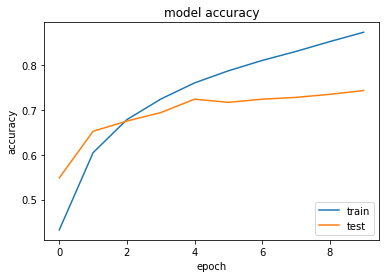

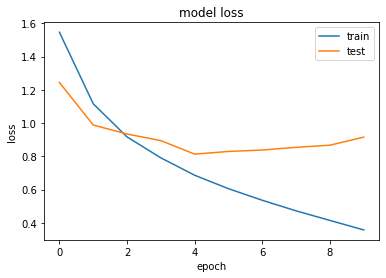

In [ ]:
# Plotting the metrics
fig = plt.figure()
#plt.subplot(2,1,1)
plt.plot()
# plt.scatter(history.history['accuracy'],history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#plt.subplot(2,1,2)
plt.plot()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


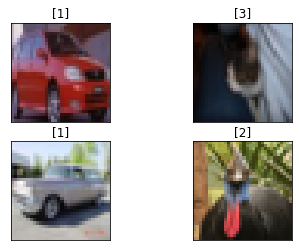

In [ ]:
# Predict
# 0 = Airplane, 1 = Automobile, 2 = Bird, 3 = Cat, 4 = Deer
# 5 = Dog, 6 = Frog, 7 = Horse, 8 = Ship, 9 = Truck
from random import randint

for i in range(4):  
    plt.subplot(2,2,i+1)
    index = randint(0,9999)
    plt.imshow(x_train[index])
    plt.xticks([])
    plt.yticks([])
    prediction = model.predict_classes(x_train[index].reshape(1,32,32,3))
    plt.title(prediction)
plt.show()

